In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
import cv2

from keras_preprocessing import image
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
images = "../input/5000-indian-cuisines-datasetwith-images/data/data"
path = "../input/5000-indian-cuisines-datasetwith-images/data/data"
full_path= []
for img in os.listdir(images):
    full_path.append(os.path.join(path, img))

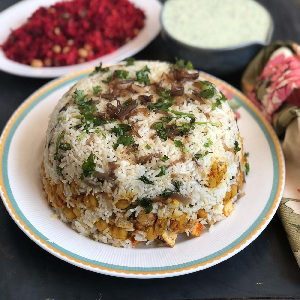

In [3]:
img = image.load_img("../input/5000-indian-cuisines-datasetwith-images/data/data/636.Chole_Masala_Biryani_Recipe_.jpg", target_size=(300, 300))
img

In [4]:
data = pd.read_csv("../input/5000-indian-cuisines-datasetwith-images/cuisine_updated.csv")

In [5]:
data.head()

,name,image_url,description,cuisine,course,diet,prep_time,ingredients,instructions,image_available
0,Doddapatre Tambuli Recipe (Karpooravalli Thayi...,https://www.archanaskitchen.com/images/archana...,Doddapatre Tambuli Recipe is a popular healing...,Indian,Side Dish,Vegetarian,Total in 30 M,\n\n\t\t\t\t\t\t\t \t\t4 cups Indian borage (D...,"To begin making the Doddapatre Tambuli, first ...",1
1,Fish Tandoori Recipe,https://www.archanaskitchen.com/images/archana...,Have you ever tried out fish tandoori? Trust m...,North Indian Recipes,Appetizer,High Protein Non Vegetarian,Total in 80 M,\n\n\t\t\t\t\t\t\t \t\t1 Fish\t\t\t\t\t\t\t \t...,"To begin making the Fish Tandoori recipe, keep...",1
2,Arbi Shimla Mirch Sabzi Recipe – Colocasia Cap...,https://www.archanaskitchen.com/images/archana...,Arbi Shimla Mirch Sabzi Recipe is a variation ...,North Indian Recipes,Main Course,No Onion No Garlic (Sattvic),Total in 55 M,\n\n\t\t\t\t\t\t\t \t\t300 grams Colocasia roo...,To begin making the Arbi Shimla Mirch Sabzi Re...,1
3,Ambur Style Brinjal Curry Recipe,https://www.archanaskitchen.com/images/archana...,Brinjal Curry is prepared in different ways in...,Indian,Lunch,Vegetarian,Total in 20 M,\n\n\t\t\t\t\t\t\t \t\t5 Brinjal (Baingan / Eg...,To begin making the Ambur Style Brinjal Curry ...,1
4,Mavinakayi Menasinakai Curry Recipe - Raw Man...,https://www.archanaskitchen.com/images/archana...,Mangalorean Mavinakayi Menasinakai Curry Recip...,Mangalorean,Side Dish,Vegetarian,Total in 35 M,\n\n\t\t\t\t\t\t\t \t\t1 cup Mango (Raw)\t\t\t...,To begin making Mangalorean Mavinakayi Menasin...,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4466 entries, 0 to 4465
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             4466 non-null   object
 1   image_url        4466 non-null   object
 2   description      4466 non-null   object
 3   cuisine          4458 non-null   object
 4   course           4424 non-null   object
 5   diet             4424 non-null   object
 6   prep_time        4454 non-null   object
 7   ingredients      4466 non-null   object
 8   instructions     4466 non-null   object
 9   image_available  4466 non-null   int64 
dtypes: int64(1), object(9)
memory usage: 349.0+ KB


In [7]:
data.isna().sum()

name                0
image_url           0
description         0
cuisine             8
course             42
diet               42
prep_time          12
ingredients         0
instructions        0
image_available     0
dtype: int64

In [8]:
data["image_available"].value_counts()

1    4466
Name: image_available, dtype: int64

In [9]:
data.shape

(4466, 10)

In [10]:
data.columns

Index(['name', 'image_url', 'description', 'cuisine', 'course', 'diet',
       'prep_time', 'ingredients', 'instructions', 'image_available'],
      dtype='object')

In [11]:
data["ingredients"][3]

'\n\n\t\t\t\t\t\t\t \t\t5 Brinjal (Baingan / Eggplant) \n\n\t\t\t\t\t\t\t \t\t1 Onion \n\n\t\t\t\t\t\t\t \t\t2 Tomatoes \n\n\t\t\t\t\t\t\t \t\t1 tablespoon Ginger Garlic Paste \n\n\t\t\t\t\t\t\t \t\t2 teaspoon Red Chilli powder \n\n\t\t\t\t\t\t\t \t\t1/4 teaspoon Turmeric powder (Haldi) \n\n\t\t\t\t\t\t\t \t\t1/2 teaspoon Coriander Powder (Dhania) \n\nSalt\t\t\t\t\t\t\t \t\t, as needed\t\t\t\t\t\t\t \t\n\n\t\t\t\t\t\t\t \t\t20 grams Tamarind\t\t\t\t\t\t\t \t\t, size of a small gooseberry\t\t\t\t\t\t\t \t\n\n\t\t\t\t\t\t\t \t\t2 tablespoon Gingelly oil \n\n\t\t\t\t\t\t\t \t\tsprig Curry leaves \n\n\t\t\t\t\t\t\t \t\t1/2 teaspoon Mustard seeds (Rai/ Kadugu) \n\n\t\t\t\t\t\t\t \t\t4 Whole Black Peppercorns \nTo Roast and Grind:\n\n\t\t\t\t\t\t\t \t\t2 tablespoons Roasted Peanuts (Moongphali) \n\n\t\t\t\t\t\t\t \t\t1 tablespoon Sesame seeds (Til seeds) \n\n\t\t\t\t\t\t\t \t\t1 tablespoon Fresh coconut \n'

In [12]:
data["description"][3]

'Brinjal Curry is prepared in different ways in different regions. Here, we have followed the style which is used in Ambur which is famous for its Brinjal Curry.\xa0'

In [13]:
data["instructions"][3]

'To begin making the Ambur Style Brinjal Curry Recipe, add oil in a heavy bottomed pan and wait till the oil heats up.Add in the mustard seeds, peppercorns, curry leaves and sliced onions, fry till onions become translucent.Then add in tomato and cook till it leaves oil on the side of the pan and then add in the ginger garlic paste sauté it well till the raw smell goes away. Next add in the brinjals and mix well.Next add in the spice powders including red chilli powder, coriander powder, turmeric powder, salt and mix well. Soak the tamarind in water for about 20 minutes and squeeze out the water.Add in the tamarind water in the pan and cook till the brinjals become soft.Next dry roast the peanuts, sesame seeds and coconut in a pan and cool down then grind that into a coarse powder. Add the ground masala to the brinjal gravy and mix well. Allow it to simmer for two minutes and switch off the flame. Serve hot.Serve this\xa0Ambur Style Brinjal Curry Recipe\xa0along with\xa0Ambur Star Chic

In [14]:
import matplotlib.pyplot as plt

In [15]:
data["course"].value_counts()

Lunch                     1741
Side Dish                  907
Dinner                     488
Dessert                    392
South Indian Breakfast     281
Main Course                201
North Indian Breakfast     125
Appetizer                   91
Indian Breakfast            85
Snack                       84
One Pot Dish                20
World Breakfast              8
Brunch                       1
Name: course, dtype: int64

In [16]:
# data = data[data["course"]!= "Brunch"]

In [17]:
# data = data[data["course"]!= "World Breakfast"]

In [18]:
data.shape

(4466, 10)

In [19]:
data.drop(columns=["image_available","image_url", "course"], inplace=True)

In [20]:
data.shape

(4466, 7)

In [21]:
data.head(2)

,name,description,cuisine,diet,prep_time,ingredients,instructions
0,Doddapatre Tambuli Recipe (Karpooravalli Thayi...,Doddapatre Tambuli Recipe is a popular healing...,Indian,Vegetarian,Total in 30 M,\n\n\t\t\t\t\t\t\t \t\t4 cups Indian borage (D...,"To begin making the Doddapatre Tambuli, first ..."
1,Fish Tandoori Recipe,Have you ever tried out fish tandoori? Trust m...,North Indian Recipes,High Protein Non Vegetarian,Total in 80 M,\n\n\t\t\t\t\t\t\t \t\t1 Fish\t\t\t\t\t\t\t \t...,"To begin making the Fish Tandoori recipe, keep..."


In [22]:
data["diet"]=data["diet"].fillna("Vegetarian")
data["prep_time"]=data["prep_time"].fillna("Total in 30 M")
data["cuisine"]=data["cuisine"].fillna("Indian")


In [23]:
data.isna().sum()

name            0
description     0
cuisine         0
diet            0
prep_time       0
ingredients     0
instructions    0
dtype: int64

In [24]:
data["diet"].value_counts()

Vegetarian                      3057
High Protein Vegetarian          539
Diabetic Friendly                253
Non Vegeterian                   252
High Protein Non Vegetarian      141
Eggetarian                        96
No Onion No Garlic (Sattvic)      63
Gluten Free                       38
Vegan                             27
Name: diet, dtype: int64

In [25]:
data["ingredients"] = data["ingredients"].replace({'[\n\t]': ''}, regex=True)

In [26]:
data["Full_items"] = data["name"] + data["description"] + data["cuisine"] + data["diet"] + data["prep_time"] + data["ingredients"] + data["instructions"]

In [27]:
data.iloc[:,-1]

0       Doddapatre Tambuli Recipe (Karpooravalli Thayi...
1       Fish Tandoori RecipeHave you ever tried out fi...
2       Arbi Shimla Mirch Sabzi Recipe – Colocasia Cap...
3       Ambur Style Brinjal Curry RecipeBrinjal Curry ...
4       Mavinakayi Menasinakai Curry Recipe  - Raw Man...
                              ...                        
4461    Tamil Nadu Style Vazha Thandu Thogayal Recipe ...
4462    Kondakadalai Vazhathandu Puli Thengai Kuzhambu...
4463    Besan & Atta Ki Roti Recipe (Chickpea Flatbrea...
4464    Cauliflower And Methi Paratha RecipeCauliflowe...
4465    Dal Chenchki ( Red Lentils with Shallots)The D...
Name: Full_items, Length: 4466, dtype: object

In [28]:
new_data = data.copy()

In [29]:
new_data.drop(columns=["name", "description","cuisine","diet","prep_time","ingredients","instructions"], inplace=True)

In [30]:
y = new_data


In [31]:
full_path[:5]

['../input/5000-indian-cuisines-datasetwith-images/data/data/825.DRUMSTICK_LEAVES_PUTTU_1600.jpg',
 '../input/5000-indian-cuisines-datasetwith-images/data/data/636.Chole_Masala_Biryani_Recipe_.jpg',
 '../input/5000-indian-cuisines-datasetwith-images/data/data/3700.Matar_Ki_Tehri_recipe-1.jpg',
 '../input/5000-indian-cuisines-datasetwith-images/data/data/3409.Broccoli_And_Egg_Burji.jpg',
 '../input/5000-indian-cuisines-datasetwith-images/data/data/4405.Coorg_Style_KadumbuttuKadambuttu_Recipe_Steamed_Rice_Balls_Recipe.jpg']

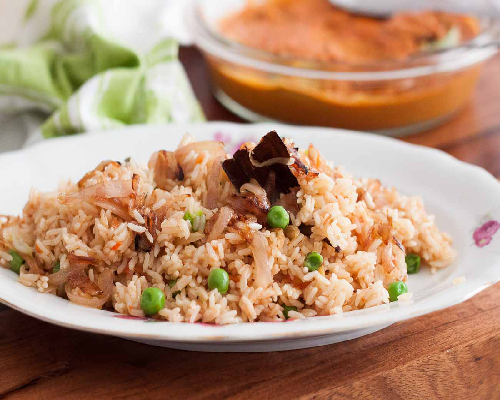

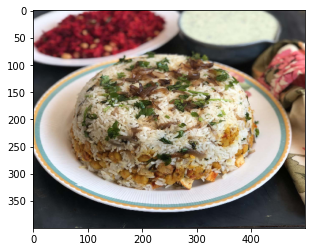

In [32]:
plt.imshow(image.load_img(full_path[0], target_size=(400,500)))
plt.imshow(image.load_img(full_path[1], target_size=(400,500)))
image.load_img(full_path[2], target_size=(400,500))

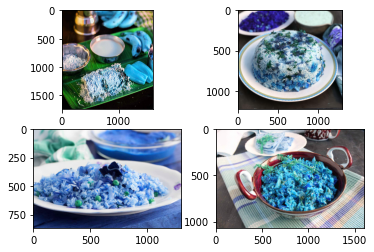

In [33]:
f, axarr = plt.subplots(2,2)
axarr[0,0].imshow(cv2.imread(full_path[0]))
axarr[0,1].imshow(cv2.imread(full_path[1]))
axarr[1,0].imshow(cv2.imread(full_path[2]))
axarr[1,1].imshow(cv2.imread(full_path[3]))


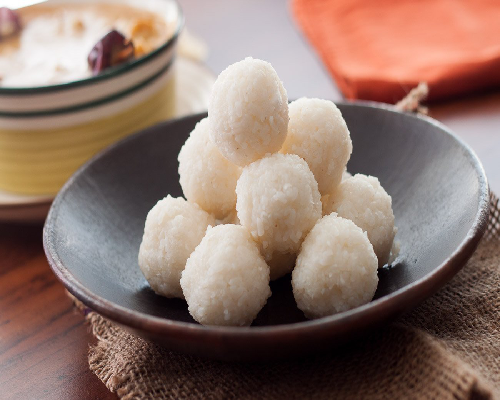

In [34]:
image.load_img(full_path[4], target_size=(400,500))

In [35]:
full_path[:5]

['../input/5000-indian-cuisines-datasetwith-images/data/data/825.DRUMSTICK_LEAVES_PUTTU_1600.jpg',
 '../input/5000-indian-cuisines-datasetwith-images/data/data/636.Chole_Masala_Biryani_Recipe_.jpg',
 '../input/5000-indian-cuisines-datasetwith-images/data/data/3700.Matar_Ki_Tehri_recipe-1.jpg',
 '../input/5000-indian-cuisines-datasetwith-images/data/data/3409.Broccoli_And_Egg_Burji.jpg',
 '../input/5000-indian-cuisines-datasetwith-images/data/data/4405.Coorg_Style_KadumbuttuKadambuttu_Recipe_Steamed_Rice_Balls_Recipe.jpg']

In [36]:
from keras_preprocessing.image import ImageDataGenerator

In [37]:
model = ImageDataGenerator(rotation_range=40, samplewise_center=True, vertical_flip=True, width_shift_range=2.3, horizontal_flip=True)

In [38]:
img0 = image.load_img(full_path[1], target_size=(500,600))

In [39]:
i = image.img_to_array(img0)

In [46]:
i.reshape(1,500,600,3).shape

(1, 500, 600, 3)

In [41]:
len(full_path)

4466

In [42]:
new_data.shape

(4466, 1)

In [62]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D,  AveragePooling2D
from keras import Sequential


In [73]:
lists_of_img = []
for i in range(0, len(full_path)):
    img0 = image.load_img(full_path[i], target_size=(500,600))
    arr = image.img_to_array(img0)
    arr = arr.reshape(1, 500, 600, 3)
    lists_of_img.append(arr)
    
    

KeyboardInterrupt: 

In [74]:
new_data = pd.DataFrame({"ig":lists_of_img})

ValueError: array length 113 does not match index length 4466

In [83]:
data_s = pd.concat([new_data, data[["name"]]], axis=1)

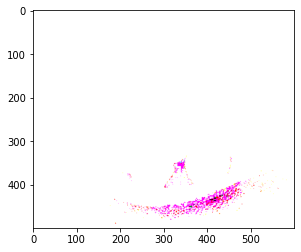

In [95]:
plt.imshow(data_s["ig"][4].reshape(500, 600,3))

In [98]:
a = [10,23]
b = a
b += [30, 40]
print(a)

[10, 23, 30, 40]


In [99]:
new_dataframe_of_image_locaton = pd.DataFrame({"path":full_path, "name":data["name"]})

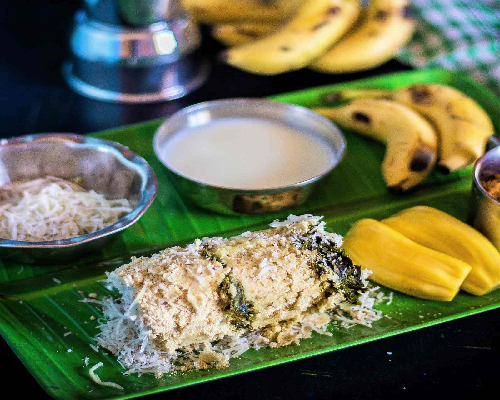

In [103]:
image.load_img(new_dataframe_of_image_locaton["path"][0], target_size=(400,500))

In [ ]:
i = 0
for i in range(0, len(full_path)):
    data_gen = ImageDataGenerator(featurewise_center=True, zoom_range=0.3, rotation_range=0.3, width_shift_range=0.2, height_shift_range=0.2)
    
    
    
    
    
    
    
    